In [1]:
# import essential libraries

import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
# read the excell file
mydata = pd.read_excel("/content/SalaryPredict.xls")

In [3]:
# Delete Columns which don't have effect to label
mydata = mydata.drop(['IDNUMBER', 'OBS'], axis=1)

In [4]:
# Create feauters and labels
y = mydata['SALARY']
X = mydata.drop('SALARY',axis=1)

In [5]:
# create a column transformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

ct = make_column_transformer(
    (MinMaxScaler() , ['LOGSAL', 'EDUC', 'SALBEGIN', 'LOGSALBEGIN' ])
)

# set the train and test datas
X_train, X_test , y_train , y_test = train_test_split(X, y , test_size=0.2, random_state=42)
# X_train = X[:380]
# X_test = X[380:]

# y_train = y[:380]
# y_test = y[380:]


# fit the column transformer to our training data
ct.fit(X_train)

# transform training and testing datas with normalization

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [10]:
# set random seed
tf.random.set_seed(42)

epoch_callback = tf.keras.callbacks.EarlyStopping( monitor='loss', patience = 15 , min_delta=20, mode='min', restore_best_weights=True )


# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss = 'mae',
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.15),
              metrics=['mae'])

# fit the model (epochs are a number of learning, verbose=0 means that training doesn't show epochs)
history = model.fit(X_train_normal,
                    y_train,
                    epochs=300,
                    callbacks=[epoch_callback])

# save the model
model.save("NormalizationModel.keras")

Epoch 1/300
12/12 [==============================] - 2s 6ms/step - loss: 34683.5469 - mae: 34683.5469
Epoch 2/300
12/12 [==============================] - 0s 6ms/step - loss: 32344.7500 - mae: 32344.7500
Epoch 3/300
12/12 [==============================] - 0s 6ms/step - loss: 20584.3652 - mae: 20584.3652
Epoch 4/300
12/12 [==============================] - 0s 5ms/step - loss: 7883.9263 - mae: 7883.9263
Epoch 5/300
12/12 [==============================] - 0s 7ms/step - loss: 6258.7632 - mae: 6258.7632
Epoch 6/300
12/12 [==============================] - 0s 7ms/step - loss: 5756.3584 - mae: 5756.3584
Epoch 7/300
12/12 [==============================] - 0s 7ms/step - loss: 5070.6738 - mae: 5070.6738
Epoch 8/300
12/12 [==============================] - 0s 5ms/step - loss: 4513.3706 - mae: 4513.3706
Epoch 9/300
12/12 [==============================] - 0s 5ms/step - loss: 4232.3242 - mae: 4232.3242
Epoch 10/300
12/12 [==============================] - 0s 5ms/step - loss: 4073.7791 - mae: 407

<Axes: >

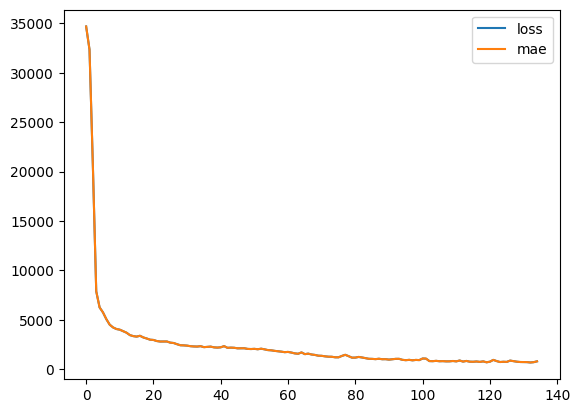

In [11]:
# lets plot history

pd.DataFrame(history.history).plot()

In [12]:
# Lets predict with testing datas
y_pred = model.predict(X_test_normal)

# Lets evaluate the model
model.evaluate(X_test_normal, y_test)

3/3 [==============================] - 0s 8ms/step - loss: 612.6802 - mae: 612.6802


[612.6802368164062, 612.6802368164062]

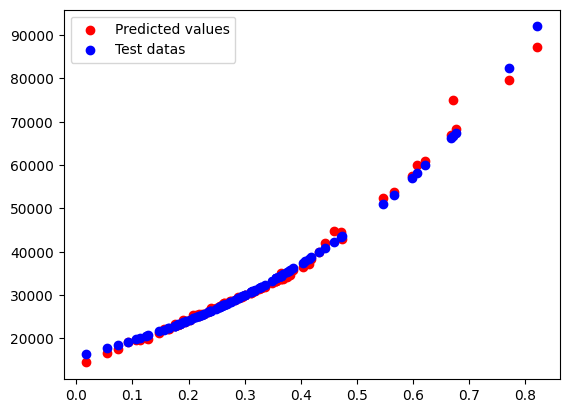

In [13]:
# plot the model predicts and test data

plt.scatter(X_test_normal[:,0], y_pred, c='r', label="Predicted values")
plt.scatter(X_test_normal[:,0], y_test, c='b', label="Test datas")
plt.legend()